In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d arjuntejaswi/plant-village

plant-village.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip plant-village.zip

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [ ]:
import os
for dirname, _, filenames in os.walk('./PlantVillage/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
./PlantVillage/Potato___Early_blight/98efaa2d-7587-48e8-8c19-4f7483e395cb___RS_Early.B 6982.JPG
./PlantVillage/Potato___Early_blight/1d2ec63e-acfb-4a80-ba21-853a724fff4a___RS_Early.B 8083.JPG
./PlantVillage/Potato___Early_blight/d063f825-aa36-4cfd-a227-4c3f30760aa2___RS_Early.B 8307.JPG
./PlantVillage/Potato___Early_blight/0d9dbf50-53a9-42b2-8b29-0360fb7dbd98___RS_Early.B 6692.JPG
./PlantVillage/Potato___Early_blight/fbc7567e-ce08-4ad0-b8fe-ffd98296ce02___RS_Early.B 8607.JPG
./PlantVillage/Potato___Early_blight/66785df0-db24-4c3d-821b-8ab94e7e6a06___RS_Early.B 7086.JPG
./PlantVillage/Potato___Early_blight/2cafa90e-af46-4d0a-9137-9780d816b96a___RS_Early.B 7731.JPG
./PlantVillage/Potato___Early_blight/6edb7358-f41f-4fd2-8371-12700bdbc94c___RS_Early.B 6801.JPG
./PlantVillage/Potato___Early_blight/192c9d29-4a86-457b-a779-1dd36f225a5b___RS_Early.B 8012.JPG
./PlantVillage/Potato___Early_blight/d9ebe6a0-d46e-47fe-950e-938f7ce83afb___RS_Early.

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #disable debug logs

In [ ]:
dir = os.listdir('./PlantVillage')
for filename in dir:
  print(filename)

Tomato_Late_blight
Potato___Late_blight
Tomato_healthy
Tomato__Tomato_mosaic_virus
Tomato__Tomato_YellowLeaf__Curl_Virus
Potato___healthy
Tomato_Bacterial_spot
Pepper__bell___healthy
Tomato_Septoria_leaf_spot
Tomato_Leaf_Mold
Pepper__bell___Bacterial_spot
Potato___Early_blight
Tomato__Target_Spot
Tomato_Early_blight
Tomato_Spider_mites_Two_spotted_spider_mite


In [ ]:
!cp -rf ./PlantVillage/Tomato_Leaf_Mold ./Tomato_Leaf_Mold

In [ ]:
!cp -rf ./PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus ./Tomato__Tomato_YellowLeaf__Curl_Virus

In [ ]:
!cp -rf ./PlantVillage/Tomato_Bacterial_spot ./Tomato_Bacterial_spot

In [ ]:
!cp -rf ./PlantVillage/Tomato_healthy ./Tomato_healthy

In [ ]:
!cp -rf ./PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite ./Tomato_Spider_mites_Two_spotted_spider_mite

In [ ]:
!cp -rf ./PlantVillage/Tomato_Early_blight ./Tomato_Early_blight

In [ ]:
!cp -rf ./PlantVillage/Tomato__Target_Spot ./Tomato__Target_Spot

In [ ]:
!cp -rf ./PlantVillage/Tomato_Late_blight ./Tomato_Late_blight

In [ ]:
!cp -rf ./PlantVillage/Tomato__Tomato_mosaic_virus ./Tomato__Tomato_mosaic_virus

In [ ]:
!cp -rf ./PlantVillage/Tomato_Septoria_leaf_spot ./Tomato_Septoria_leaf_spot

In [ ]:
Current_Dir = '/content/Tomato'
dataset_dir = pathlib.Path(Current_Dir)
print(dataset_dir)

/content/Tomato


In [ ]:
Image_Size = 50
Batch_Size = 50
Channels = 3
EPOCHS = 50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
dataset_dir,
shuffle=True,
image_size=(Image_Size, Image_Size),
batch_size=Batch_Size
)

Found 23974 files belonging to 10 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [ ]:
len(dataset)

480

In [ ]:
for images, labels in dataset.take(1):
    print(images[0].numpy())
    print(images[0].shape)
    print(labels.numpy())  

[[[102.4092   102.4092   102.4092  ]
  [114.034    114.034    114.034   ]
  [104.474    104.474    104.474   ]
  ...
  [136.982    140.982    139.982   ]
  [139.       143.       142.      ]
  [137.93999  141.93999  140.93999 ]]

 [[108.2924   108.2924   108.2924  ]
  [108.9488   108.9488   108.9488  ]
  [114.15     114.15     114.15    ]
  ...
  [140.474    144.474    143.474   ]
  [143.8524   147.8524   146.8524  ]
  [142.18     146.18     145.18    ]]

 [[108.952    108.952    108.952   ]
  [102.009995 102.009995 102.009995]
  [104.8      104.8      104.8     ]
  ...
  [144.       148.       147.      ]
  [143.18001  147.18001  146.18001 ]
  [143.       147.       146.      ]]

 ...

 [[115.742    114.742    109.742   ]
  [119.85999  118.85999  113.85999 ]
  [119.81002  118.81002  113.81002 ]
  ...
  [127.79     128.79     122.79    ]
  [131.688    132.688    126.68801 ]
  [135.63998  136.63998  130.63998 ]]

 [[115.950806 114.950806 109.950806]
  [113.60483  112.60483  107.60483 ]


(50, 50, 3)


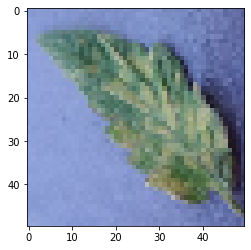

In [ ]:
for images, labels in dataset.take(1):
    a = images[24].numpy()
    print(a.shape)
    # print(images[0].shape)
    # print(labels.numpy())
    plt.imshow(images[50].numpy().astype('uint8'))

(50, 50, 3)


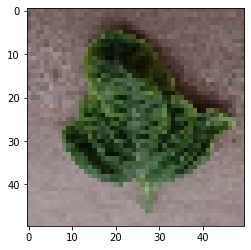

In [ ]:
a = np.zeros((480, 50, 50, 3))
i = 0
for images, labels in dataset.take(480):
    a[i] = images[0].numpy()
    print(a.shape)
    # print(images[0].shape)
    # print(labels.numpy())
    plt.imshow(images[0].numpy().astype('uint8'))

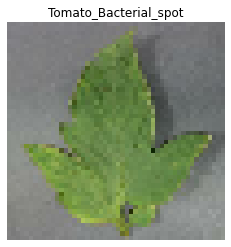

In [ ]:
# Explore an Image and its Label
for images, labels in dataset.take(1):
    plt.imshow(images[0].numpy().astype('uint8'))
    plt.axis('off')
    plt.title(class_names[labels[0].numpy()])

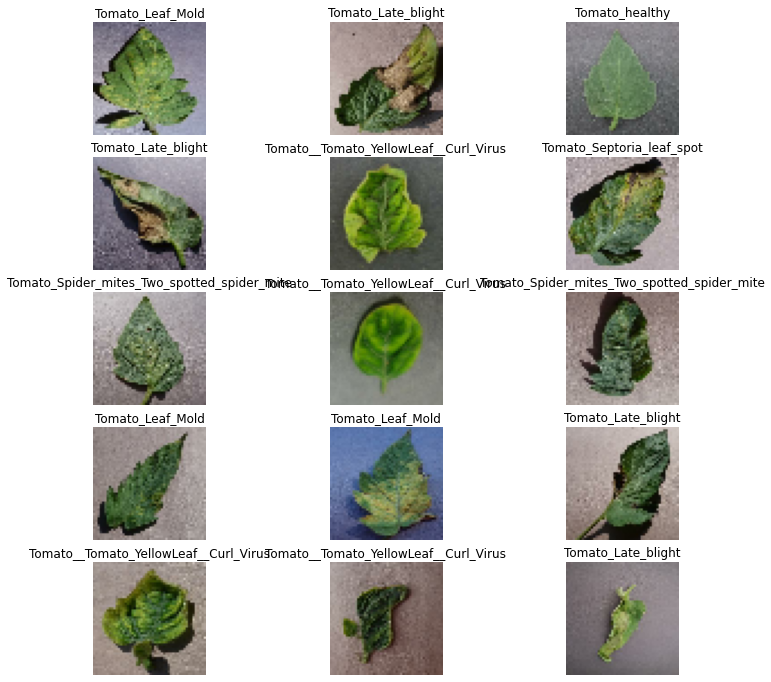

In [ ]:
plt.figure(figsize=(12,12))
for image_batch, label_batch in dataset.take(1):
    for i in range(15):
        plt.subplot(5,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [ ]:
def split_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 10)
        
    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train, val, test = split_dataset(dataset)
len(train),len(val),len(test)

(384, 48, 48)

In [ ]:
train = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val = val.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_Size, Image_Size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
# Data augmentation 
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(factor = 0.2)
])

In [ ]:
input_shape=(Image_Size, Image_Size, Channels)
n_classes=10
from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model_3 = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)#include top -> last layer will not execute
base_model_3.trainable = False ## Not trainable weights

base_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                              

In [ ]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
droupout_1 = layers.Dropout(0.3)
dense_layer_2 = layers.Dense(20, activation='relu')
droupout_2 = layers.Dropout(0.3)
prediction_layer = layers.Dense(10, activation='softmax')

In [ ]:
model_3 = models.Sequential([
    resize_and_rescale, 
    data_augmentation,
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
resnethistory = model_3.fit(
    train, 
    epochs = EPOCHS, 
    batch_size = Batch_Size, 
    verbose = 1, 
    validation_data = val)

Epoch 1/50
384/384 [==============================] - 22s 51ms/step - loss: 1.4284 - accuracy: 0.5247 - val_loss: 1.1708 - val_accuracy: 0.6037
Epoch 2/50
384/384 [==============================] - 19s 50ms/step - loss: 1.0065 - accuracy: 0.6623 - val_loss: 0.9157 - val_accuracy: 0.6817
Epoch 3/50
384/384 [==============================] - 19s 50ms/step - loss: 0.9064 - accuracy: 0.6926 - val_loss: 0.9247 - val_accuracy: 0.6804
Epoch 4/50
384/384 [==============================] - 20s 51ms/step - loss: 0.8452 - accuracy: 0.7140 - val_loss: 0.7901 - val_accuracy: 0.7267
Epoch 5/50
384/384 [==============================] - 20s 52ms/step - loss: 0.8072 - accuracy: 0.7256 - val_loss: 0.7909 - val_accuracy: 0.7354
Epoch 6/50
384/384 [==============================] - 19s 50ms/step - loss: 0.7798 - accuracy: 0.7325 - val_loss: 0.7952 - val_accuracy: 0.7292
Epoch 7/50
384/384 [==============================] - 19s 50ms/step - loss: 0.7550 - accuracy: 0.7415 - val_loss: 0.7566 - val_accuracy:

In [ ]:
pred_3 = model_3.predict(val)

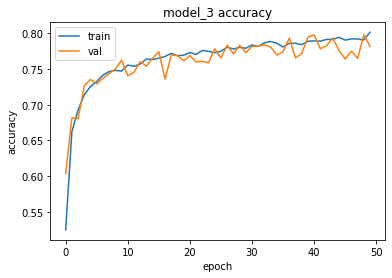

In [ ]:
plt.plot(resnethistory.history['accuracy'])
plt.plot(resnethistory.history['val_accuracy'])
plt.title('model_3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

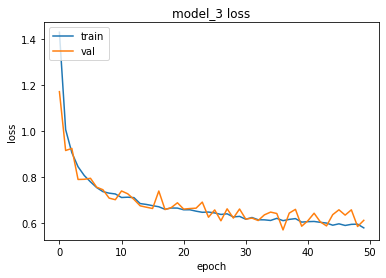

In [ ]:
plt.plot(resnethistory.history['loss'])
plt.plot(resnethistory.history['val_loss'])
plt.title('model_3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrices import accuracy_score
print(accuracy_score(pred, train))

ModuleNotFoundError: ignored